<a href="https://colab.research.google.com/github/Dysonym/machinelearningcourse-week3-fraud-detection/blob/master/Week3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instructions**

Build a logistic regression model using Scikit-learn to predict fraudulent transactions by training it on this kaggle dataset. Before you train the model, create at least 1 visualization of the data using the seaborn library of your choice. This should be submitted as a ""jupyter notebook". This link will help you understand the flow of this process.

In [0]:
#Imports
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, normalize
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import random
import zipfile
import gc
from os.path import isfile

try:
  from google.colab import files
  IN_COLAB = True
except:
  IN_COLAB = False



In [0]:
if(not isfile("ieee-fraud-detection.zip")):
  print("Please place ieee-fraud-detection.zip in the current directory")
  print("From: https://www.kaggle.com/c/14242/download-all")
  raise Exception("Missing ieee-fraud-detection.zip, please upload to colab, or place in current directory.")
  

In [0]:
#reading data

with zipfile.ZipFile("ieee-fraud-detection.zip") as zip:
  with zip.open("train_transaction.csv") as train_transaction_csv:
    data = pd.read_csv(train_transaction_csv, index_col="TransactionID")
  #with zip.open("train_identity.csv") as train_identity_csv:
  #  identity_data = pd.read_csv(train_identity_csv, index_col="TransactionID")
    
#data = transaction_data.join(identity_data) Got actually better results without identity_data
#data = transaction_data
#del(transaction_data)
#del(identity_data)
#gc.collect()






In [4]:
#Encode Strings
categories = {}
string_columns = [column for column in data.columns if data[column].dtype == object]
for c in string_columns:
  data[c] = data[c].astype('category')
  categories[c] = data[c].cat.categories
  data[c] = data[c].cat.codes
  
print(len(categories))


14


In [5]:
#Drop collumns where there are too many null values
treshold =  len(data)*.99
print("Number of columns before droping columns with many NaN values: ", len(data.columns))
data.dropna(axis="columns", thresh=treshold, inplace=True)
print("Number of columns after droping columns with many NaN values: ", len(data.columns))

#Drop rows where there are NaN values
print("Rows before dropping NaN values: ", len(data))
data.dropna(inplace=True)
print("Rows after dropping NaN values: ", len(data))

Number of columns before droping columns with many NaN values:  393
Number of columns after droping columns with many NaN values:  121
Rows before dropping NaN values:  590540
Rows after dropping NaN values:  584853


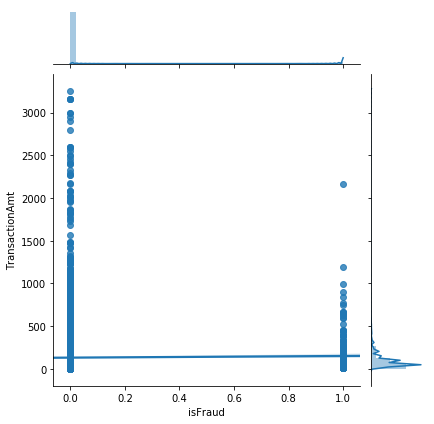

In [6]:
plot_data = data.loc[ lambda d: d.TransactionAmt < 10000, ["isFraud", "TransactionAmt"]].iloc[0:10000] # one crazy transaction is crazy high
sns.jointplot(data=plot_data, x="isFraud", y="TransactionAmt", kind='reg')
del plot_data

In [7]:
#Spliting the data for training

x = scale(data.loc[:, data.columns != "isFraud"])
y = data.loc[:, "isFraud"]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

print(len(X_train))

380154


In [8]:
#Logistic Model

logistic = linear_model.LogisticRegression(C=1e7, class_weight={0:1, 1:25}, solver="lbfgs", n_jobs=-1, max_iter=200)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

print("Total Fraud predictions: ", sum(y_pred))
print("Logistic Model Score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




Total Fraud predictions:  49367
Logistic Model Score:  0.7745421325946878
              precision    recall  f1-score   support

           0       0.99      0.78      0.87    197715
           1       0.10      0.73      0.18      6984

    accuracy                           0.77    204699
   macro avg       0.55      0.75      0.53    204699
weighted avg       0.96      0.77      0.85    204699



In [9]:
random_forest = RandomForestClassifier(n_estimators=150, random_state=0, n_jobs=-1, class_weight={0:1, 1:30})
random_forest.fit(X_train, y_train)

forest_pred = random_forest.predict(X_test)

print("Total Fraud predictions: ", sum(forest_pred))
print("Random Forest Model Score: ", accuracy_score(y_test, forest_pred))
print(classification_report(y_test, forest_pred))


Total Fraud predictions:  3066
Random Forest Model Score:  0.9783096155819032
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    197715
           1       0.91      0.40      0.56      6984

    accuracy                           0.98    204699
   macro avg       0.95      0.70      0.77    204699
weighted avg       0.98      0.98      0.97    204699

